In [46]:
from arcgis.gis import GIS


myGIS = GIS('https://jonclasses.maps.arcgis.com/', 'Jon.J.Lu','newskillz-69')

<Item title:"Satellite (MODIS) Thermal Hotspots and Fire Activity" type:Feature Layer Collection owner:esri_livefeeds2>
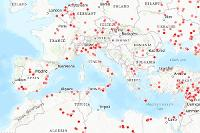

In [47]:
fire_live = myGIS.content.get("b8f4033069f141729ffb298b7418b653")
fire_live

<Item title:"Washington_State_Fire_History" type:Feature Layer Collection owner:Jon.J.Lu>
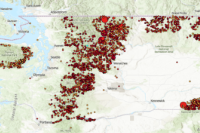

In [48]:
fire_history = myGIS.content.get("fbac9fa1d47d4aed81623731336ba742")
fire_history

<Item title:"WA_County_Boundary" type:Feature Layer Collection owner:Jon.J.Lu>
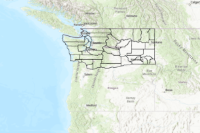

In [49]:
county_boundary = myGIS.content.get("7288d59d10c14be493fcb8d215cf1463")
county_boundary

In [50]:
myMap = myGIS.map("Washington, State")
myMap

MapView(layout=Layout(height='400px', width='100%'))

In [51]:
myMap.add_layer(fire_live)
myMap.add_layer(fire_history)
myMap.add_layer(county_boundary)

In [52]:
fire_history_layer = fire_history.layers[0]
county_boundary_layer = county_boundary.layers[0]

In [53]:
for field in fire_history_layer.properties.fields:
    print(field['name'])

OBJECTID
DISCOVER_YEAR
FIRE_NUMBER
COUNTY
TOTAL_ACRES_BURNED
TOPO_LANDFORM_ORIGIN
PRESCRIBED_FIRE
SLOPE
ELEVATION
OTHER_FUEL_MODEL
REP_WX_STATION
LAT_DEG
LAT_MIN
LAT_SEC
LONG_DEG
LONG_MIN
LONG_SEC
TOWNSHIP
RANGE
SECTION
SUB_SECTION
WIND_SPEED
DISCOVERED_BY_DESCR
FIRE_NAME
RECORD_ENTRY_DATE
AGENCY_ACRES
OTHER_ACRES_INSIDE
OTHER_ACRES_OUTSIDE
DISTRICT
LOCAL_FIRE_NUMBER
PRESCRIBED_ACRES
IGNITION
DISCOVERY
STRATEGY_MET
FIRE_OUT
SUBMITTED_DATE
APPROVED_DATE
STATE_CODE
CONTAINED
COUNTY_STATE_CODE
LOCATION
FIRE_MANAGEMENT_CODE
COMPLEX_FIRE
WUI_FIRE
WUI_ACRES
OBJECTIVES
CREATED_DATE
LAST_MODIFIED_DATE
POO_LATITUDE
POO_LONGITUDE
COMPLEX_NAME
STATION_TYPE
STATION_NAME
ASPECT
PRINCIPAL_MERIDIAN
STATISTICAL_CAUSE
FIRE_SIZE_CLASS
FIRE_DETECTOR
NFDRS_FUEL_MODEL
COVER_CLASS
FIRE_INTENSITY_LEVEL
INITIAL_STRATEGY
LOCAL_TIMEZONE
PROTECTING_AGENCY_AT_ORIGIN
OWNERSHIP_AGENCY_AT_ORIGIN
STATE_NAME
COUNTY_NAME
REPORT_UNIT
REPORT_UNIT_NAME
ADMIN_UNIT
ADMIN_UNIT_NAME
OWNERSHIP_UNIT
OWNERSHIP_UNIT_NAME
PROTECTI

In [54]:
for field in county_boundary_layer.properties.fields:
    print(field['name'])

OBJECTID
STATEFP
COUNTYFP
COUNTYNS
GEOID
NAME
NAMELSAD
LSAD
CLASSFP
MTFCC
CSAFP
CBSAFP
METDIVFP
FUNCSTAT
ALAND
AWATER
INTPTLAT
INTPTLON
Shape__Area
Shape__Length


In [55]:
from arcgis.features import summarize_data

fire_summary = summarize_data.aggregate_points(point_layer = fire_history_layer,
                                              polygon_layer = county_boundary_layer,
                                              keep_boundaries_with_no_points = True,
                                              summary_fields = ['TOTAL_ACRES_BURNED Sum'])

In [56]:
fire_summary

{'aggregated_layer': <FeatureCollection>, 'group_summary': ''}

In [66]:
fire_history_aggregate = fire_summary['aggregated_layer']

fire_history_aggregate_fset = fire_history_aggregate.query()

In [67]:
fire_history_aggregate_df = fire_history_aggregate_fset.sdf

fire_history_aggregate_df.head()

,OBJECTID,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape__Area,Shape__Length,sum_total_acres_burned,Point_Count,AnalysisArea,SHAPE
0,1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,,,,A,680976231,61568965,+46.2946377,-123.4244583,0.086692,1.449177,0.0,0,742.545558,"{""rings"": [[[-123.49076699999995, 46.383583000..."
1,2,53,029,01513272,53029,Island,Island County,06,H1,G4020,500,36020,,A,539943912,799920796,+48.1585538,-122.6706492,0.161982,1.860858,0.1,1,1339.865365,"{""rings"": [[[-122.42508699999996, 48.275259000..."
2,3,53,055,01531931,53055,San Juan,San Juan County,06,H1,G4020,,,,A,450432205,1157478544,+48.5071904,-123.1037693,0.195903,2.050102,1.0,1,1607.912841,"{""rings"": [[[-122.94038699999999, 48.352446000..."
3,4,53,035,01529223,53035,Kitsap,Kitsap County,06,H1,G4020,500,14740,,A,1023308791,442187072,+47.6395948,-122.6496339,0.175410,2.090992,0.0,0,1465.495469,"{""rings"": [[[-122.45478099999997, 47.576186000..."
4,5,53,011,01531820,53011,Clark,Clark County,06,H1,G4020,440,38900,,A,1627792396,70200672,+45.7717295,-122.4859533,0.196436,2.119934,0.4,1,1697.993827,"{""rings"": [[[-122.55603999999994, 45.956602000..."


In [74]:
import matplotlib.pyplot as plt

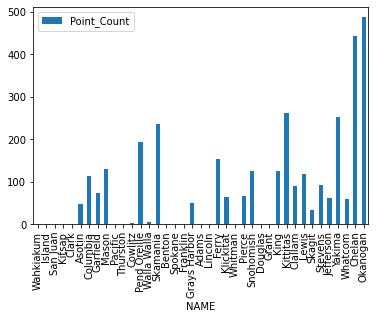

In [85]:
%matplotlib inline
fire_history_aggregate_df.plot("NAME","Point_Count", kind ="bar")
plt.show()